# Advanced Statistic -- Exercize Sheet 5

Valente Alessandro 1234429


## Ex 5.1


A publishing company has recently launched a new journal. In order to determine how effective it
is in reaching its possible audience, a market survey company selects a random sample of people
from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read
the last issue of the journal.

**a)** What kind of distribution would you assume for y, the number of people that have seen the last issue of the yournal ?

I would assume a binomial distribution with:
$$ n=150\quad y=29 \quad p=\frac{29}{150} $$ 
namely:
$$ P(y|p,n,M) = \left(\begin{array}{l}
n \\
y
\end{array}\right) p^{y}(1-p)^{n-y} \quad \text { with } \quad y \leq n$$

**b)** Assuming a uniform prior, what is the posterior distribution for y ?

If we assume a uniform prior $P(p|M)\sim \mathcal{U}(0,1)$ we do obtain a posterior distribution that does not depend on the prior and so becomes proportional to the likelihood so it's also a binomial distribution:

$$P(p | y, n, M)=\frac{1}{C}\, p^{y}(1-p)^{n-y}$$

where $C$ is a normalization constant that can be estimated numerically

**c)** Plot both posterior and likelihood ditributions functions

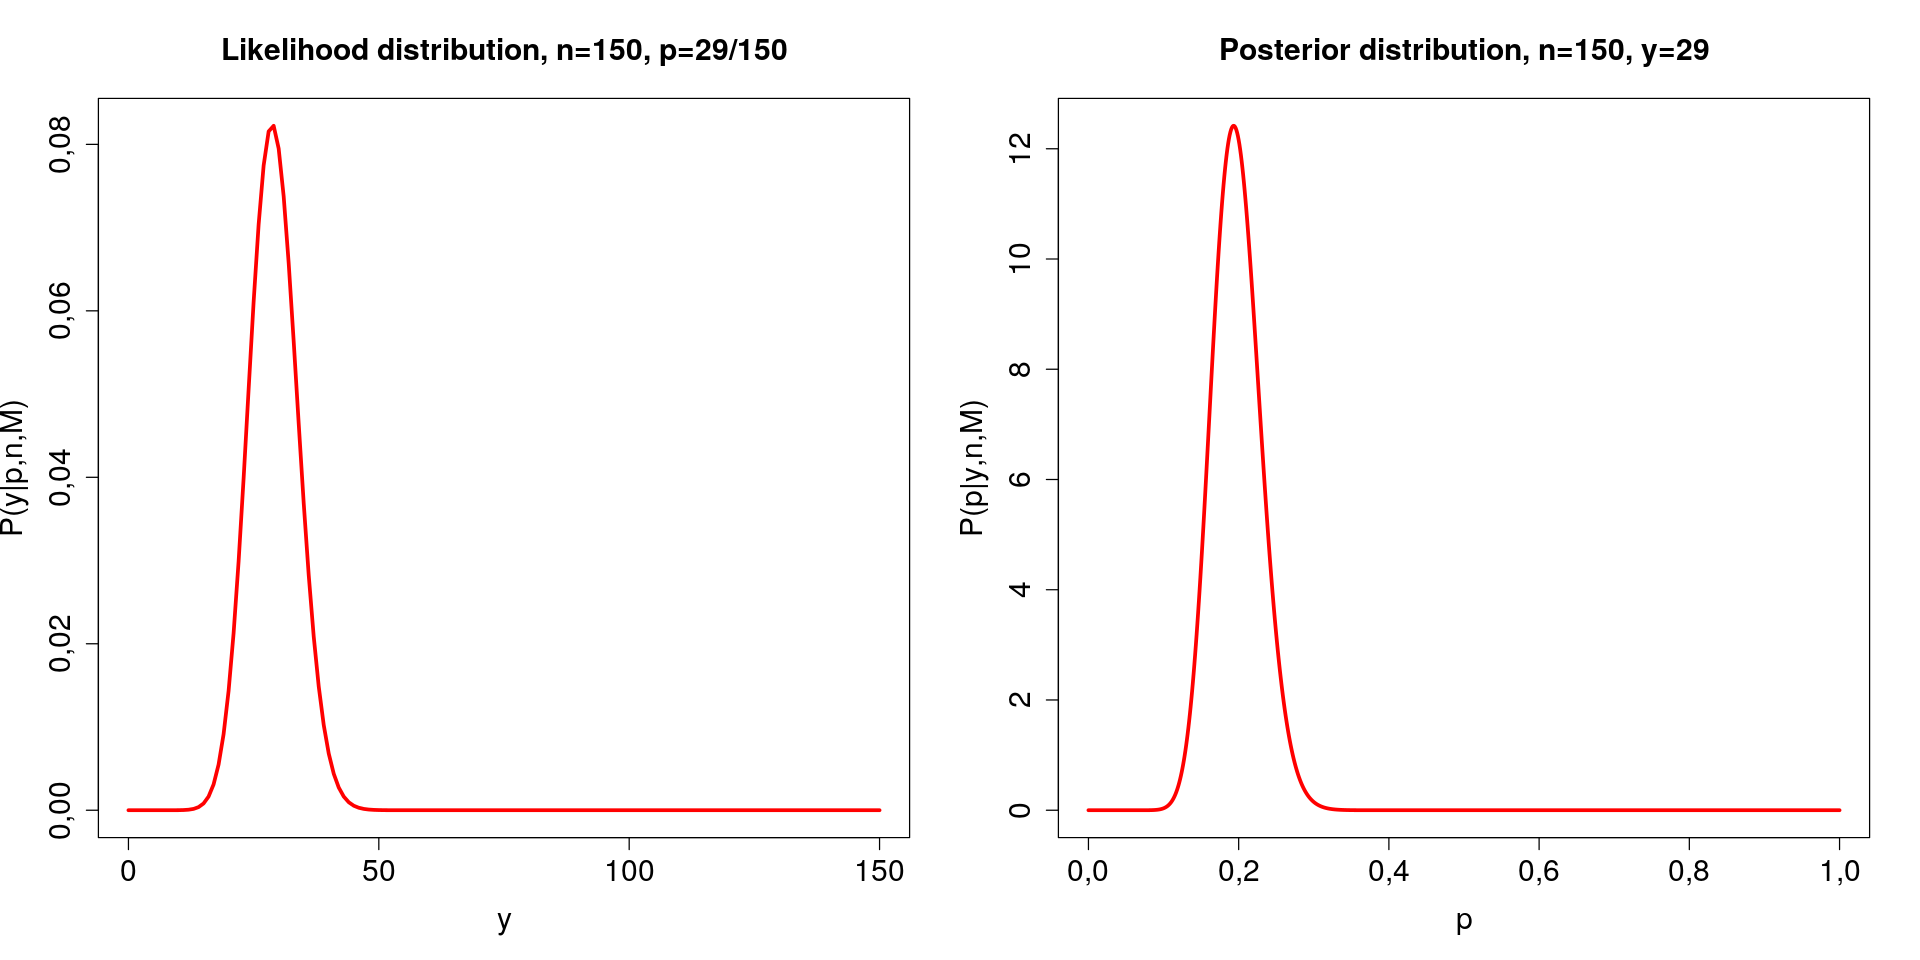

In [1]:
par(cex.lab=1.5, cex.axis=1.5, cex.main=1.5)

options(repr.plot.width=16, repr.plot.height=8)
area <- matrix (c(1,2), nrow=1, ncol=2, byrow=TRUE)
layout(area)


n <-150
y <- 29
p <- y/n

x <- seq (0,1, 0.001)
ys <- seq (0, n, 1)

plot(ys, dbinom(ys, n, p), type='l', xlab='y', ylab='P(y|p,n,M)', main='Likelihood distribution, n=150, p=29/150', col='red', lwd=3)
#posterior normalization term
c<- integrate(function(x){dbinom(y,n,x)}, lower=0, upper=1)$value
plot(x,  dbinom(y, n, x)/c , type='l', xlab='p', ylab='P(p|y,n,M)', main='Posterior distribution, n=150, y=29', col='red', lwd=3)


## Ex.2

Three students want to construct their prior probability about the proportion of residents that
support the building of a new concert hall in their small town:
- Anna thinks that her prior is a beta distribution with mean 0.2 and a standard deviation of 0.08.
- Benny moved only recently to this new town and therefore he does non have the slightest idea about
it. Therefore he decides to use a uniform prior.
- Chris believes that his prior should have a trapezoidal shape

$$f(X)=\left\{\begin{array}{cl}
20 x & 0 \leq 1<0.1 \\
2 & 0.1 \leq 1<0.3 \\
5-10 x & 0.3<\leq 0.5 \\
0 & x \geq 0.5
\end{array}\right.$$

**a/b)** Draw and compare the three prior distributions.

Before drawing we need to estimate the parameters of the beta prior, starting from the mean $\mu$ and the standart deviation $\sigma$ we know that:

$$
\mu= \frac{\alpha}{\alpha + \beta} \quad
\sigma^2 =\frac{\alpha \beta}{(\alpha+\beta)^{2}(\alpha+\beta+1)}$$

we can observe that
$$ \mu(1-\mu) = \frac{\alpha}{\alpha + \beta}\left(1-\frac{\alpha}{\alpha + \beta} \right)= \frac{\alpha\beta}{(\alpha +\beta)^2} $$

substituting this in the second equation we derive:
$$\alpha +\beta = \underbrace{\frac{\mu(1-\mu)}{\sigma^2}-1}_{= \gamma} $$

where $\gamma$ is a known quantity since it does not depende on $\alpha$ and $\beta$, we can then obtain from the first equation a system for the beta function parameters:

$$
\begin{cases}
(\alpha +\beta)\,\mu =\alpha \\
\alpha +\beta =\gamma
\end{cases}
\quad \implies \quad
\begin{cases}
\alpha=\gamma\mu\\
\beta= \gamma(1-\mu)
\end{cases}
$$

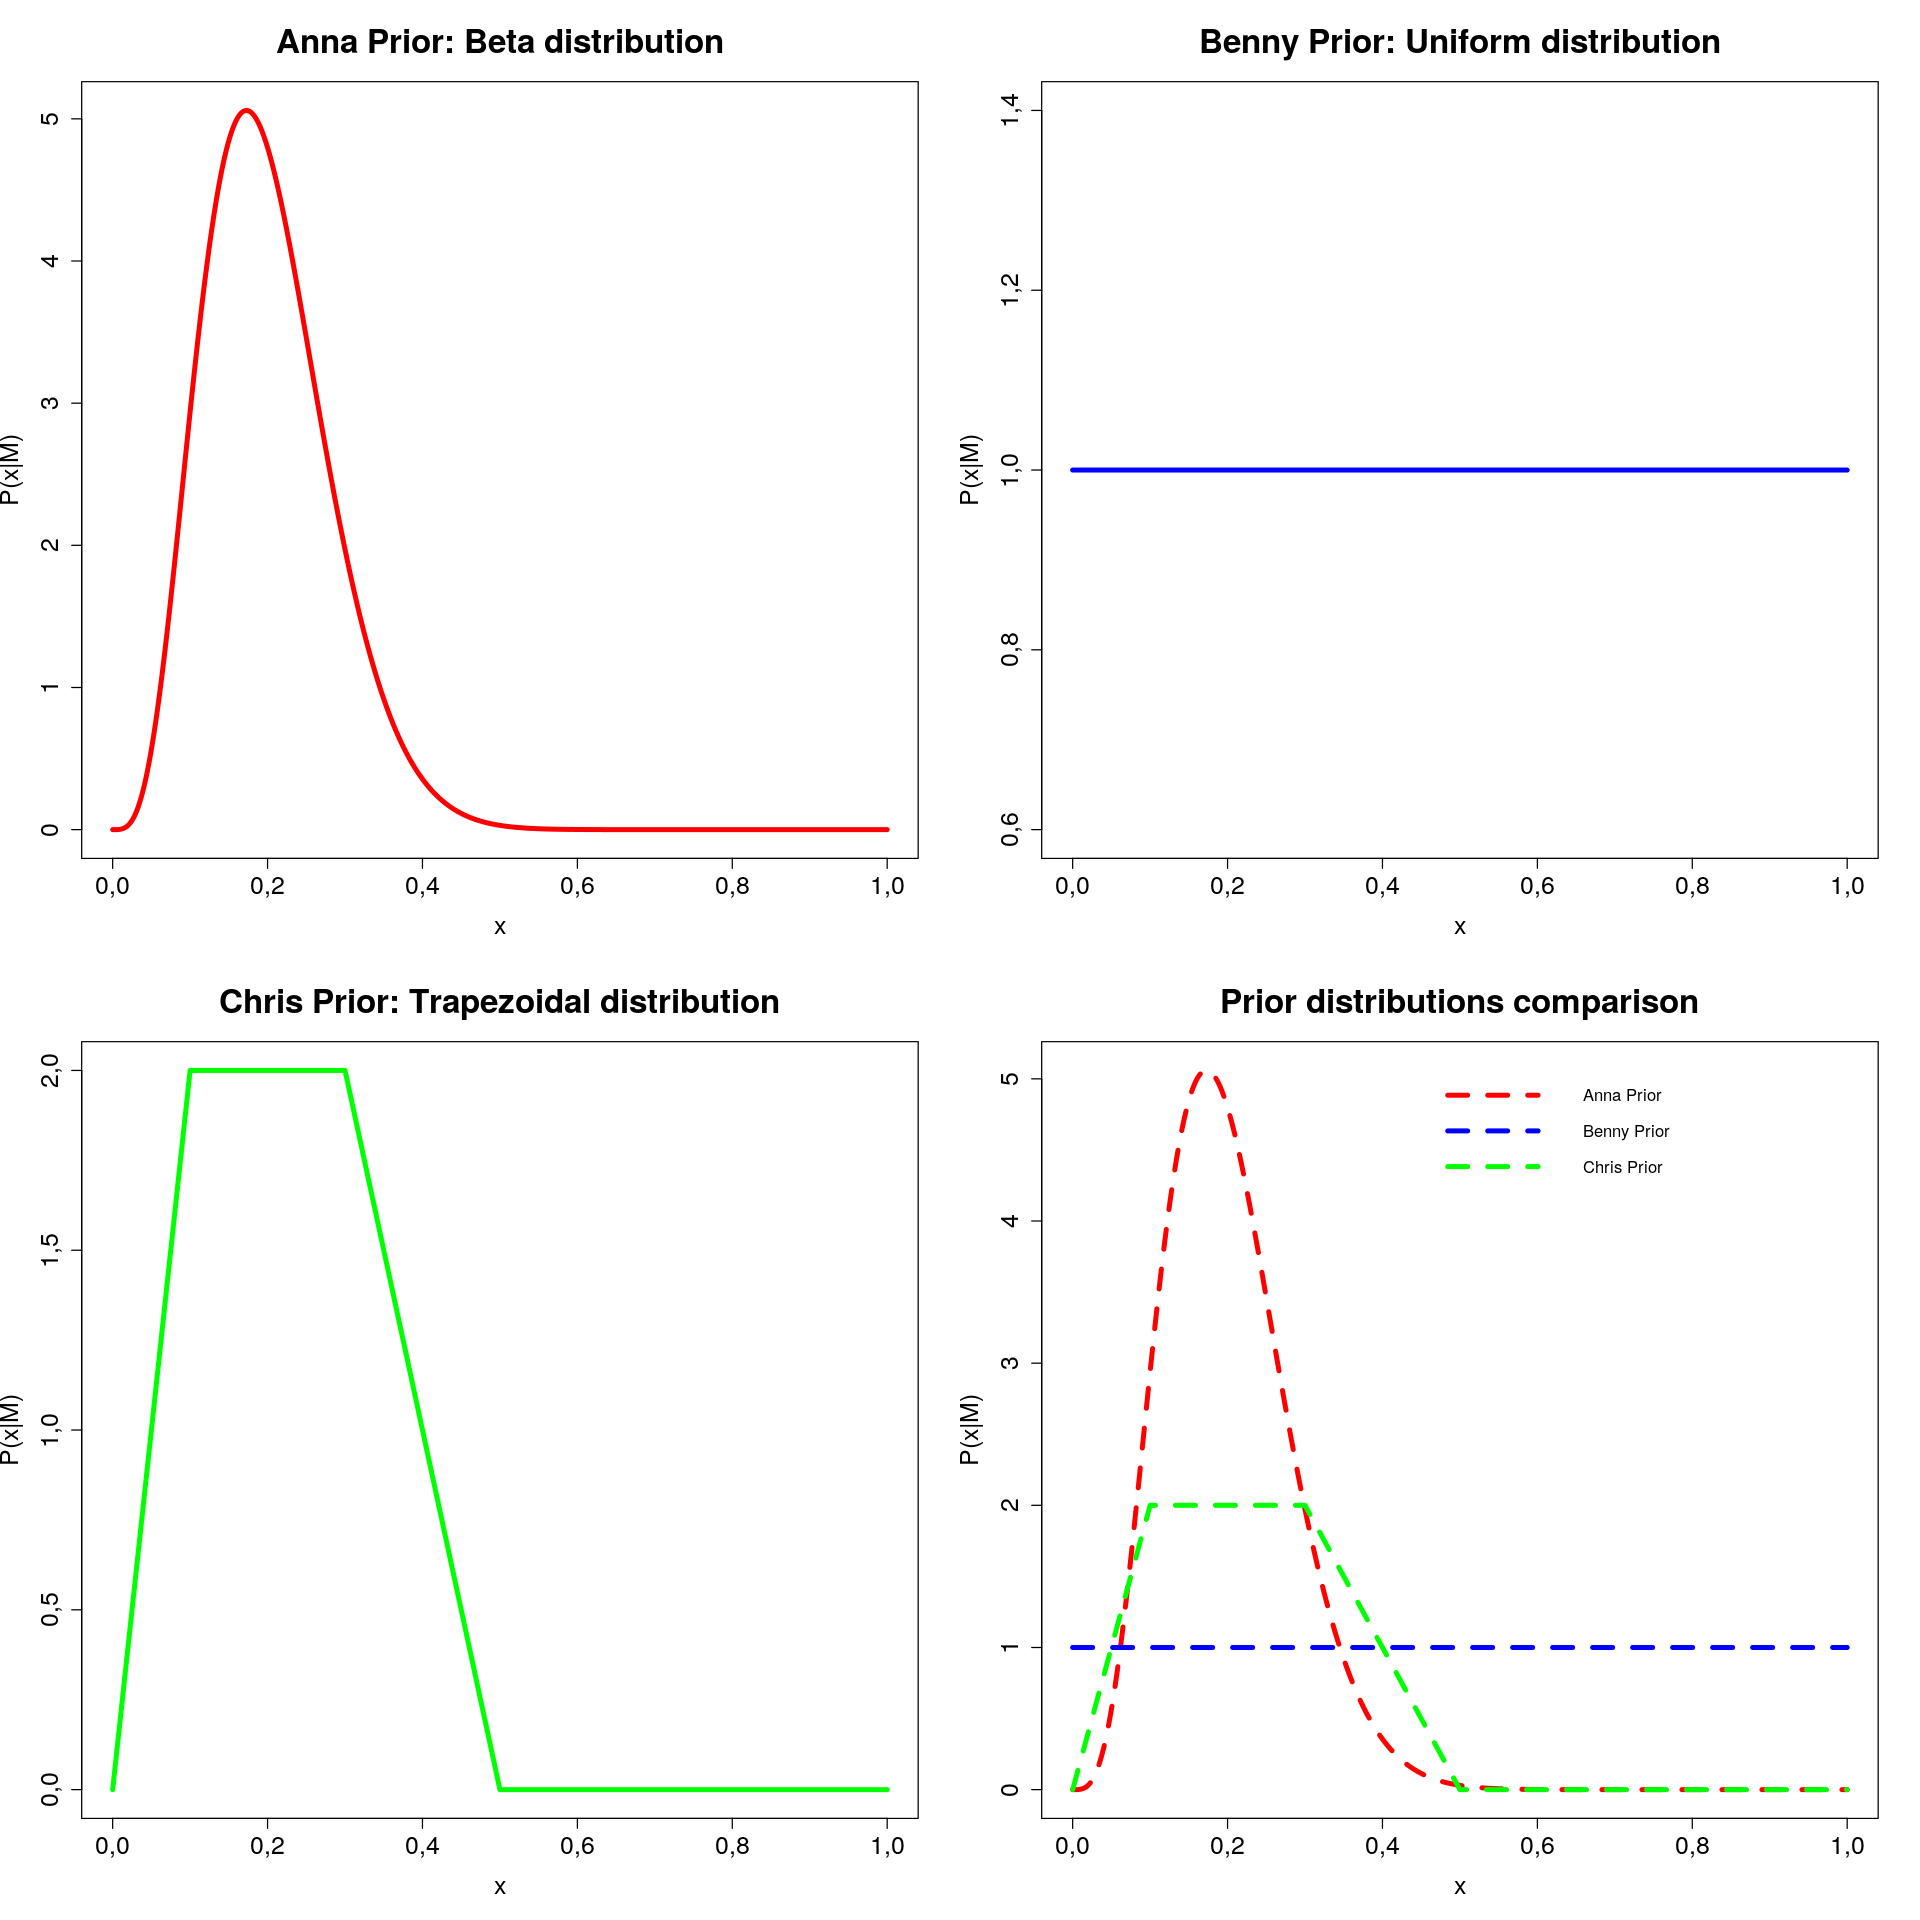

In [2]:
par(cex.lab=1.5, cex.axis=1.5, cex.main=2)
options(repr.plot.width=16,repr.plot.height=16)
area <- matrix (c(1,2,3,4), nrow=2, ncol=2, byrow=TRUE)
layout(area)

#beta prior parameters estimation
mu <- 0.2; sigma <- 0.08; sigma2 <- sigma^2
gamma <- mu*(1-mu)/sigma2-1
alpha <- gamma*mu ; beta <- gamma*(1-mu)

ann_prior <- function (x){
    return (dbeta(x, alpha, beta))
}

ben_prior <- function (x){
    ifelse(x<0, 0, ifelse(x>1, 0, 1))
}

chr_prior <- function (x){
    ifelse( x<0  , 0, 
    ifelse( x<0.1, 20*x , 
    ifelse( x<0.3, 2,
    ifelse( x<0.5, 5-10*x, 
           0 ))))
}

x <- seq(0,1, 0.001)

plot(x, ann_prior(x), type='l', col='red', lwd=4, xlab='x', ylab='P(x|M)', main='Anna Prior: Beta distribution')
plot(x, ben_prior(x), type='l', col='blue', lwd=4, xlab='x', ylab='P(x|M)', main='Benny Prior: Uniform distribution')
plot(x, chr_prior(x), type='l', col='green', lwd=4, xlab='x', ylab='P(x|M)', main='Chris Prior: Trapezoidal distribution')

plot (x, ann_prior(x), type='l', lty='dashed', col='red', lwd=4, xlab='x', ylab='P(x|M)', main='Prior distributions comparison')
lines(x, ben_prior(x), lty='dashed', col='blue', lwd=4, xlab='x', ylab='P(x|M)')
lines(x, chr_prior(x), lty='dashed', col='green', lwd=4, xlab='x', ylab='P(x|M)')
legend("topright", legend=c("Anna Prior", "Benny Prior", "Chris Prior"), 
       col=c('red', 'blue', 'green'),  lty='dashed', lwd=4, bty='n',y.intersp=0.5)



The next day the three students decide to interview a sample of 100 citizens of the small town,
asking for their opinion. Out of the interviewed sample, 26 support the building of the new concert
hall.

**c)** Give an estimate of the most probable value and the 95% credibility interval.

Assuming a binomial distribution for the likelihood 

$$ P(y|x,n,M) = \left(\begin{array}{l}
n \\
y
\end{array}\right) x^{y}(1-x)^{n-y} \quad \text { with } \quad y \leq n$$

where x indicates the portion of residents supporting the new building, we can compute the 3 different posterior distribution for x.

- From Anna's prior we obtain a beta distribution as posterior with parameters given by the sum of the initial parameters ($\alpha_p \, \beta_p$) with the data collected
$$ P(x | y, n, A)=Beta(\alpha , \beta)=Beta(\alpha_p + y, \beta_p+n-y)$$
- For Benny's prior we can do the same reasoning since the uniform distribution can be witten as a beta ditribution with unitary parameters $\mathcal{U}(0,1)=Beta(1,1)$, so we obtain
$$ P(x | y, n, B)=Beta(\alpha , \beta)=Beta(1 + y, 1+n-y)$$
- For Chris prior we can numerically compute the posterior distribution as the product between the prior and the likelihood and then normalize it by integrating the distribution


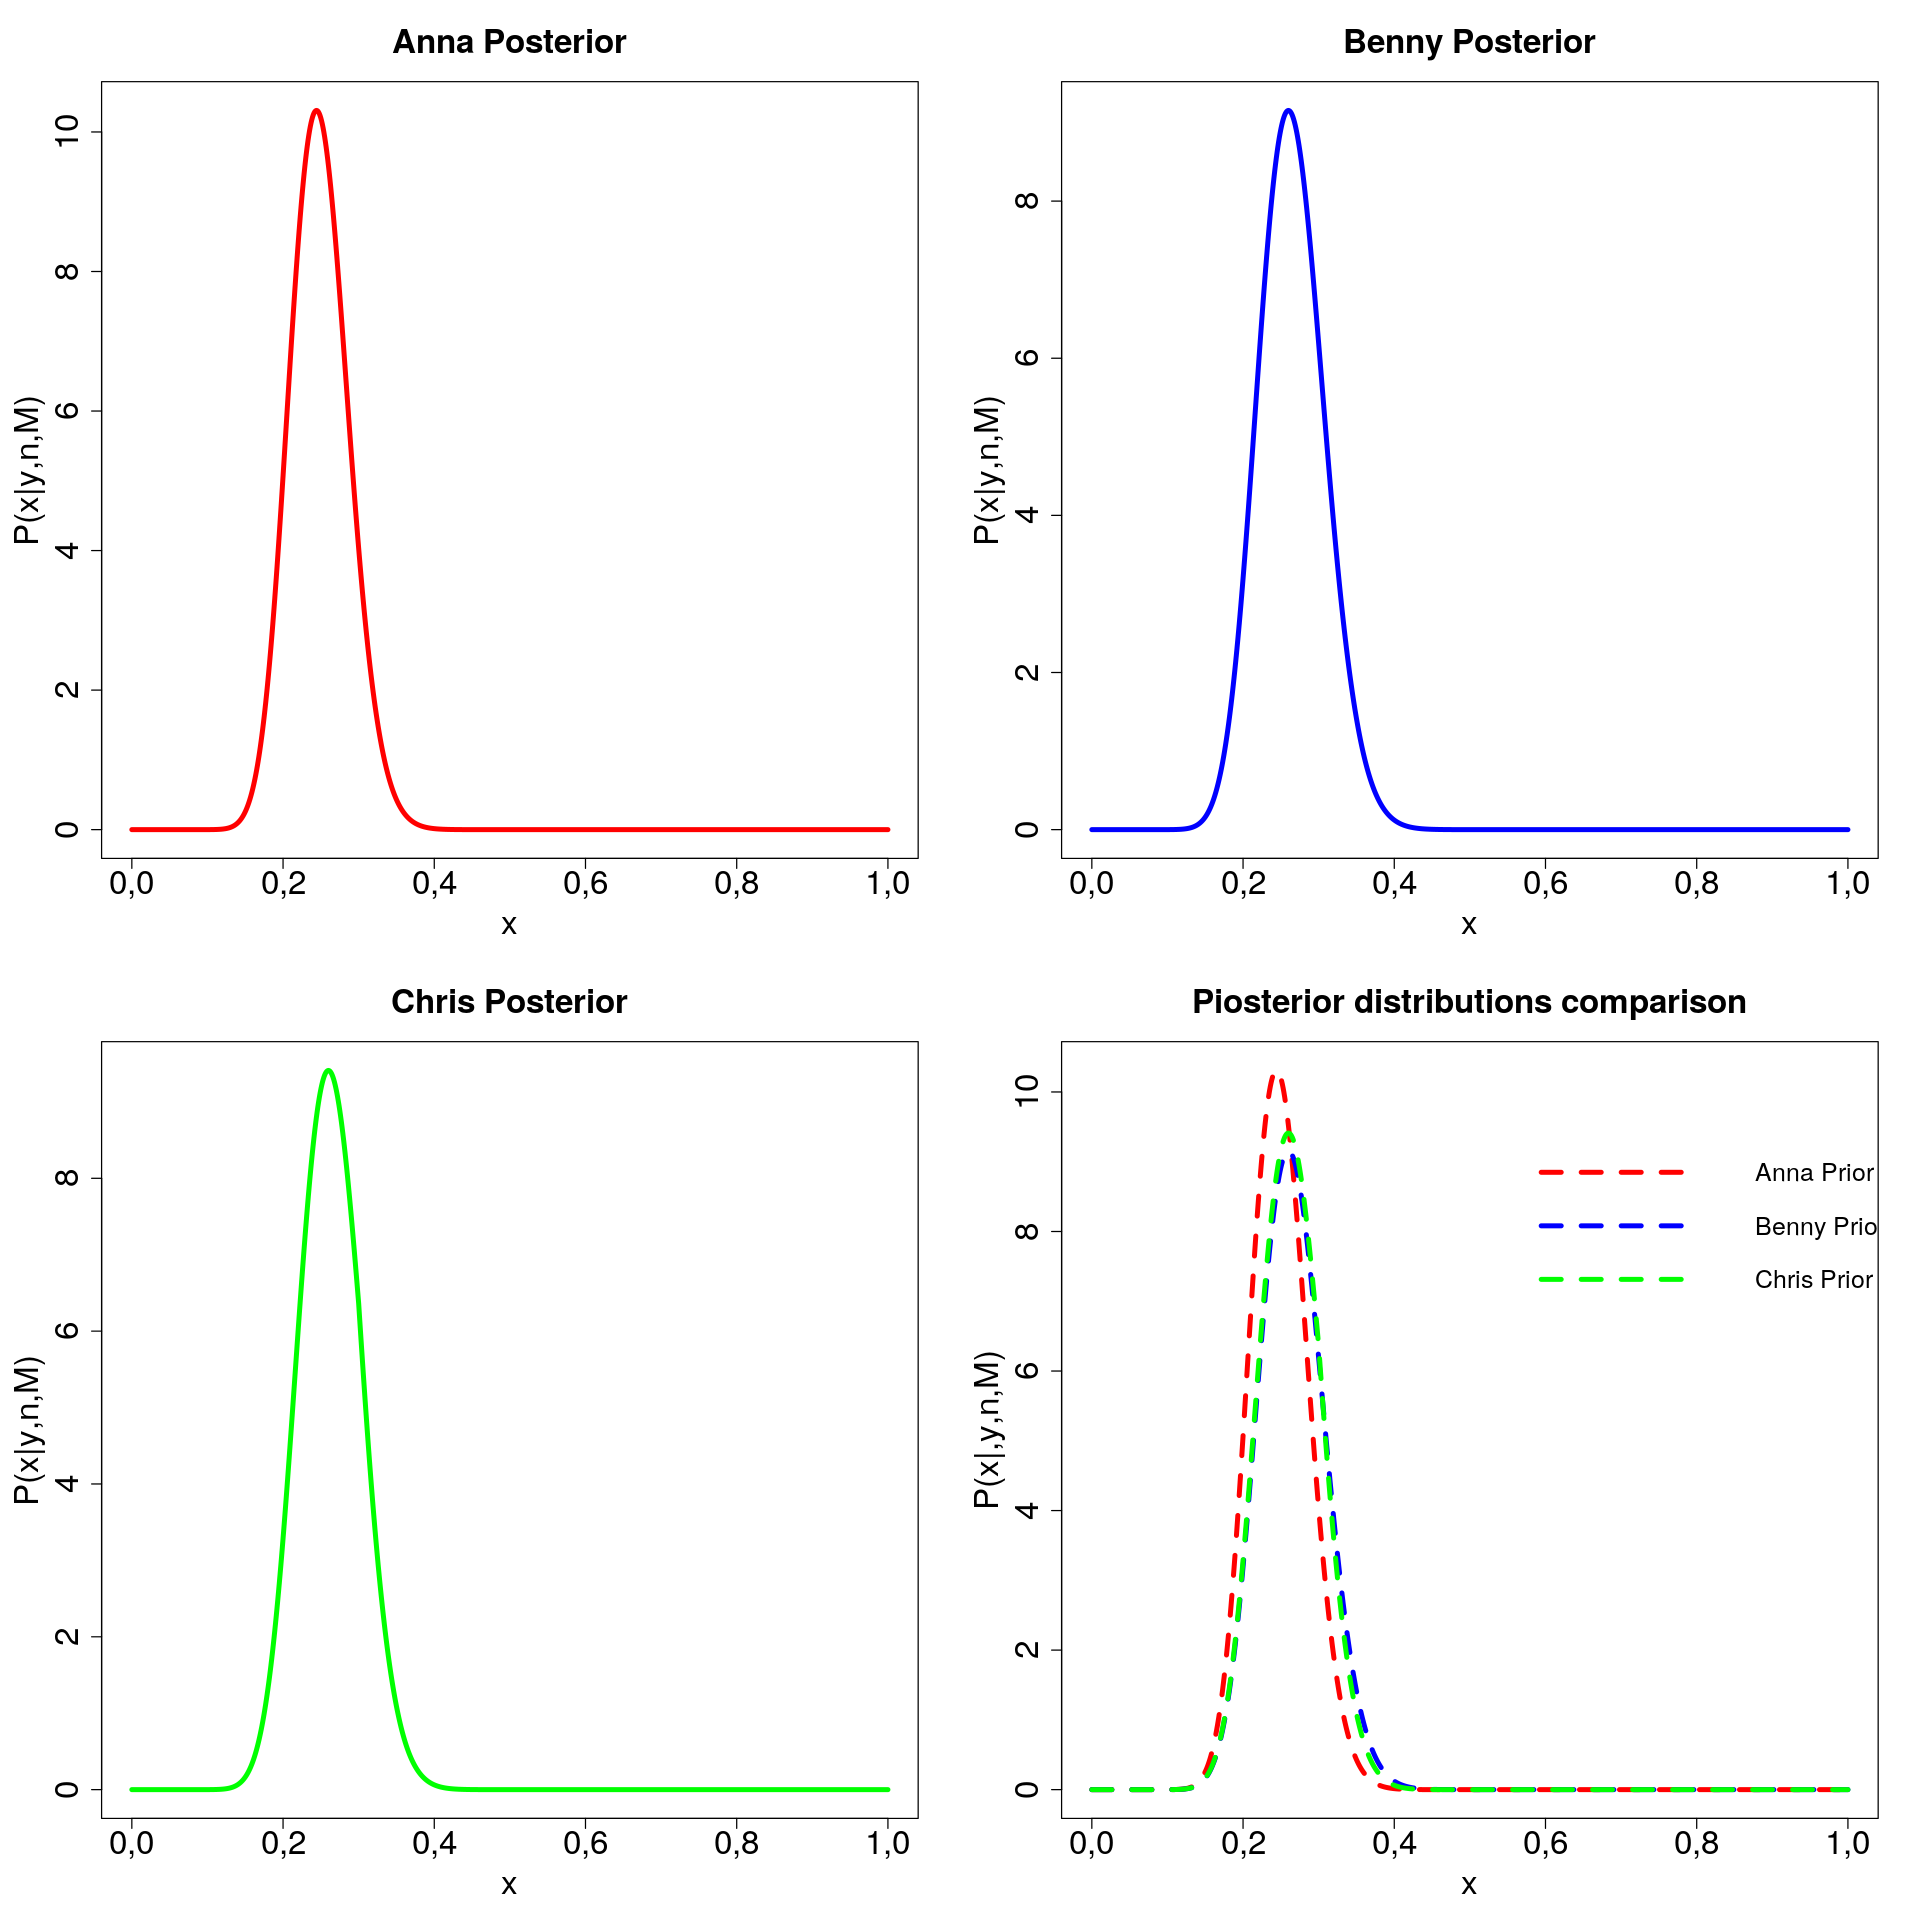

In [3]:
y <- 26
n <- 100

ann_post <- function (x){
    return (dbeta(x,alpha+y, beta+n-y))
}
ben_post <- function (x){
    return (dbeta(x,1+y, 1+n-y))
}

c <- integrate(function(x){dbinom(y, n, x)*chr_prior(x)}, lower=0, upper=1)$value
chr_post <- function (x){
    return (dbinom(y, n, x)*chr_prior(x)/c)
}


par(cex.lab=2, cex.axis=2, cex.main=2, mar=c(5, 5, 4, 2) + 0.1)
options(repr.plot.width=16,repr.plot.height=16)
area <- matrix (c(1,2,3,4), nrow=2, ncol=2, byrow=TRUE)
layout(area)
x <- seq(0,1, 0.001)
plot(x, ann_post(x), type='l', col='red', lwd=4, xlab='x',  ylab='P(x|y,n,M)', main='Anna Posterior')
plot(x, ben_post(x), type='l', col='blue', lwd=4, xlab='x', ylab='P(x|y,n,M)', main='Benny Posterior')
plot(x, chr_post(x), type='l', col='green', lwd=4, xlab='x',ylab='P(x|y,n,M)', main='Chris Posterior')

plot (x, ann_post(x), type='l', lty='dashed', col='red', lwd=4, xlab='x', ylab='P(x|,y,n,M)', main='Piosterior distributions comparison')
lines(x, ben_post(x), lty='dashed', col='blue', lwd=4, xlab='x', ylab='P(x|M)')
lines(x, chr_post(x), lty='dashed', col='green', lwd=4, xlab='x', ylab='P(x|M)')
legend(0.5,10, legend=c("Anna Prior", "Benny Prior", "Chris Prior"), 
       col=c('red', 'blue', 'green'),  lty='dashed', lwd=4, bty='n',y.intersp=0.5, cex=1.5)





The most probable value can be then estimated as the maximum of the posterior, for Anna and Benny's prior we know the analytical expression of the maximum for the beta distribution:
$$p_{MAX}=\frac{y+\alpha-1}{n+\alpha+\beta-2}$$

while for Chris it will be computed numerically.



In [4]:
ann_pMax = (y+alpha-1)/(n+alpha+beta-2)
ben_pMax = y/n #alpha=beta=1 for the uniform prior
chr_pMax = optimize(chr_post, interval=c(0,1), maximum=TRUE)$maximum

print(paste("Most probable value from Anna distriubtion: ", round(ann_pMax,3)))
print(paste("Most probable value from Benny distriubtion:", round(ben_pMax,3)))
print(paste("Most probable value from Chris distriubtion:", round(chr_pMax,3)))

[1] "Most probable value from Anna distriubtion:  0,244"
[1] "Most probable value from Benny distriubtion: 0,26"
[1] "Most probable value from Chris distriubtion: 0,26"


As we can see the results are almost equal from the three prior distribution, which was expected from the plot of the posterior distributions.

At last integrating the posterior distribution we will determinate the $95\%$ credibility interval.

As we can see from the plots above the posterior PDFs are almost simmetric with respect to their maximum aside from the different lenght of the tail so we can with good approximation estimate the credibility interval as centered in the maximum, in the code below i define a function which computes the value of the integral from each posterior in an interval centered in the maximum, the interval bounds are then computed as the distance needed for the integral to be 0.95

In [5]:
ann_integ <- function(x) {
    integrate(ann_post,lower=ann_pMax-x, upper=ann_pMax+x)$value
}

ben_integ <- function(x) {
    integrate(ben_post,lower=ben_pMax-x, upper=ben_pMax+x)$value
}

chr_integ <- function(x) {
    integrate(chr_post,lower=chr_pMax-x, upper=chr_pMax+x)$value
}


dist <- seq(0, 0.24, 0.001)

integ_ann <- sapply(dist,ann_integ)
p_min_ann <- ann_pMax - dist[which.min(abs(integ_ann - 0.95))]
p_max_ann <- ann_pMax + dist[which.min(abs(integ_ann - 0.95))]

integ_ben <- sapply(dist,ben_integ)
p_min_ben <- ben_pMax - dist[which.min(abs(integ_ben - 0.95))]
p_max_ben <- ben_pMax + dist[which.min(abs(integ_ben - 0.95))]

integ_chr <- sapply(dist,chr_integ)
p_min_chr <- chr_pMax - dist[which.min(abs(integ_chr - 0.95))]
p_max_chr <- chr_pMax + dist[which.min(abs(integ_chr - 0.95))]

print(paste("Anna 95% credibility interval:  [",round(p_min_ann,3),",",round(p_max_ann,3),"]"))
print(paste("Benny 95% credibility interval: [",round(p_min_ben,3),",",round(p_max_ben,3),"]"))
print(paste("Chris 95% credibility interval: [",round(p_min_chr,3),",",round(p_max_chr,3),"]"))

[1] "Anna 95% credibility interval:  [ 0,168 , 0,32 ]"
[1] "Benny 95% credibility interval: [ 0,174 , 0,346 ]"
[1] "Chris 95% credibility interval: [ 0,179 , 0,341 ]"


All this results can are summarized in the plot below

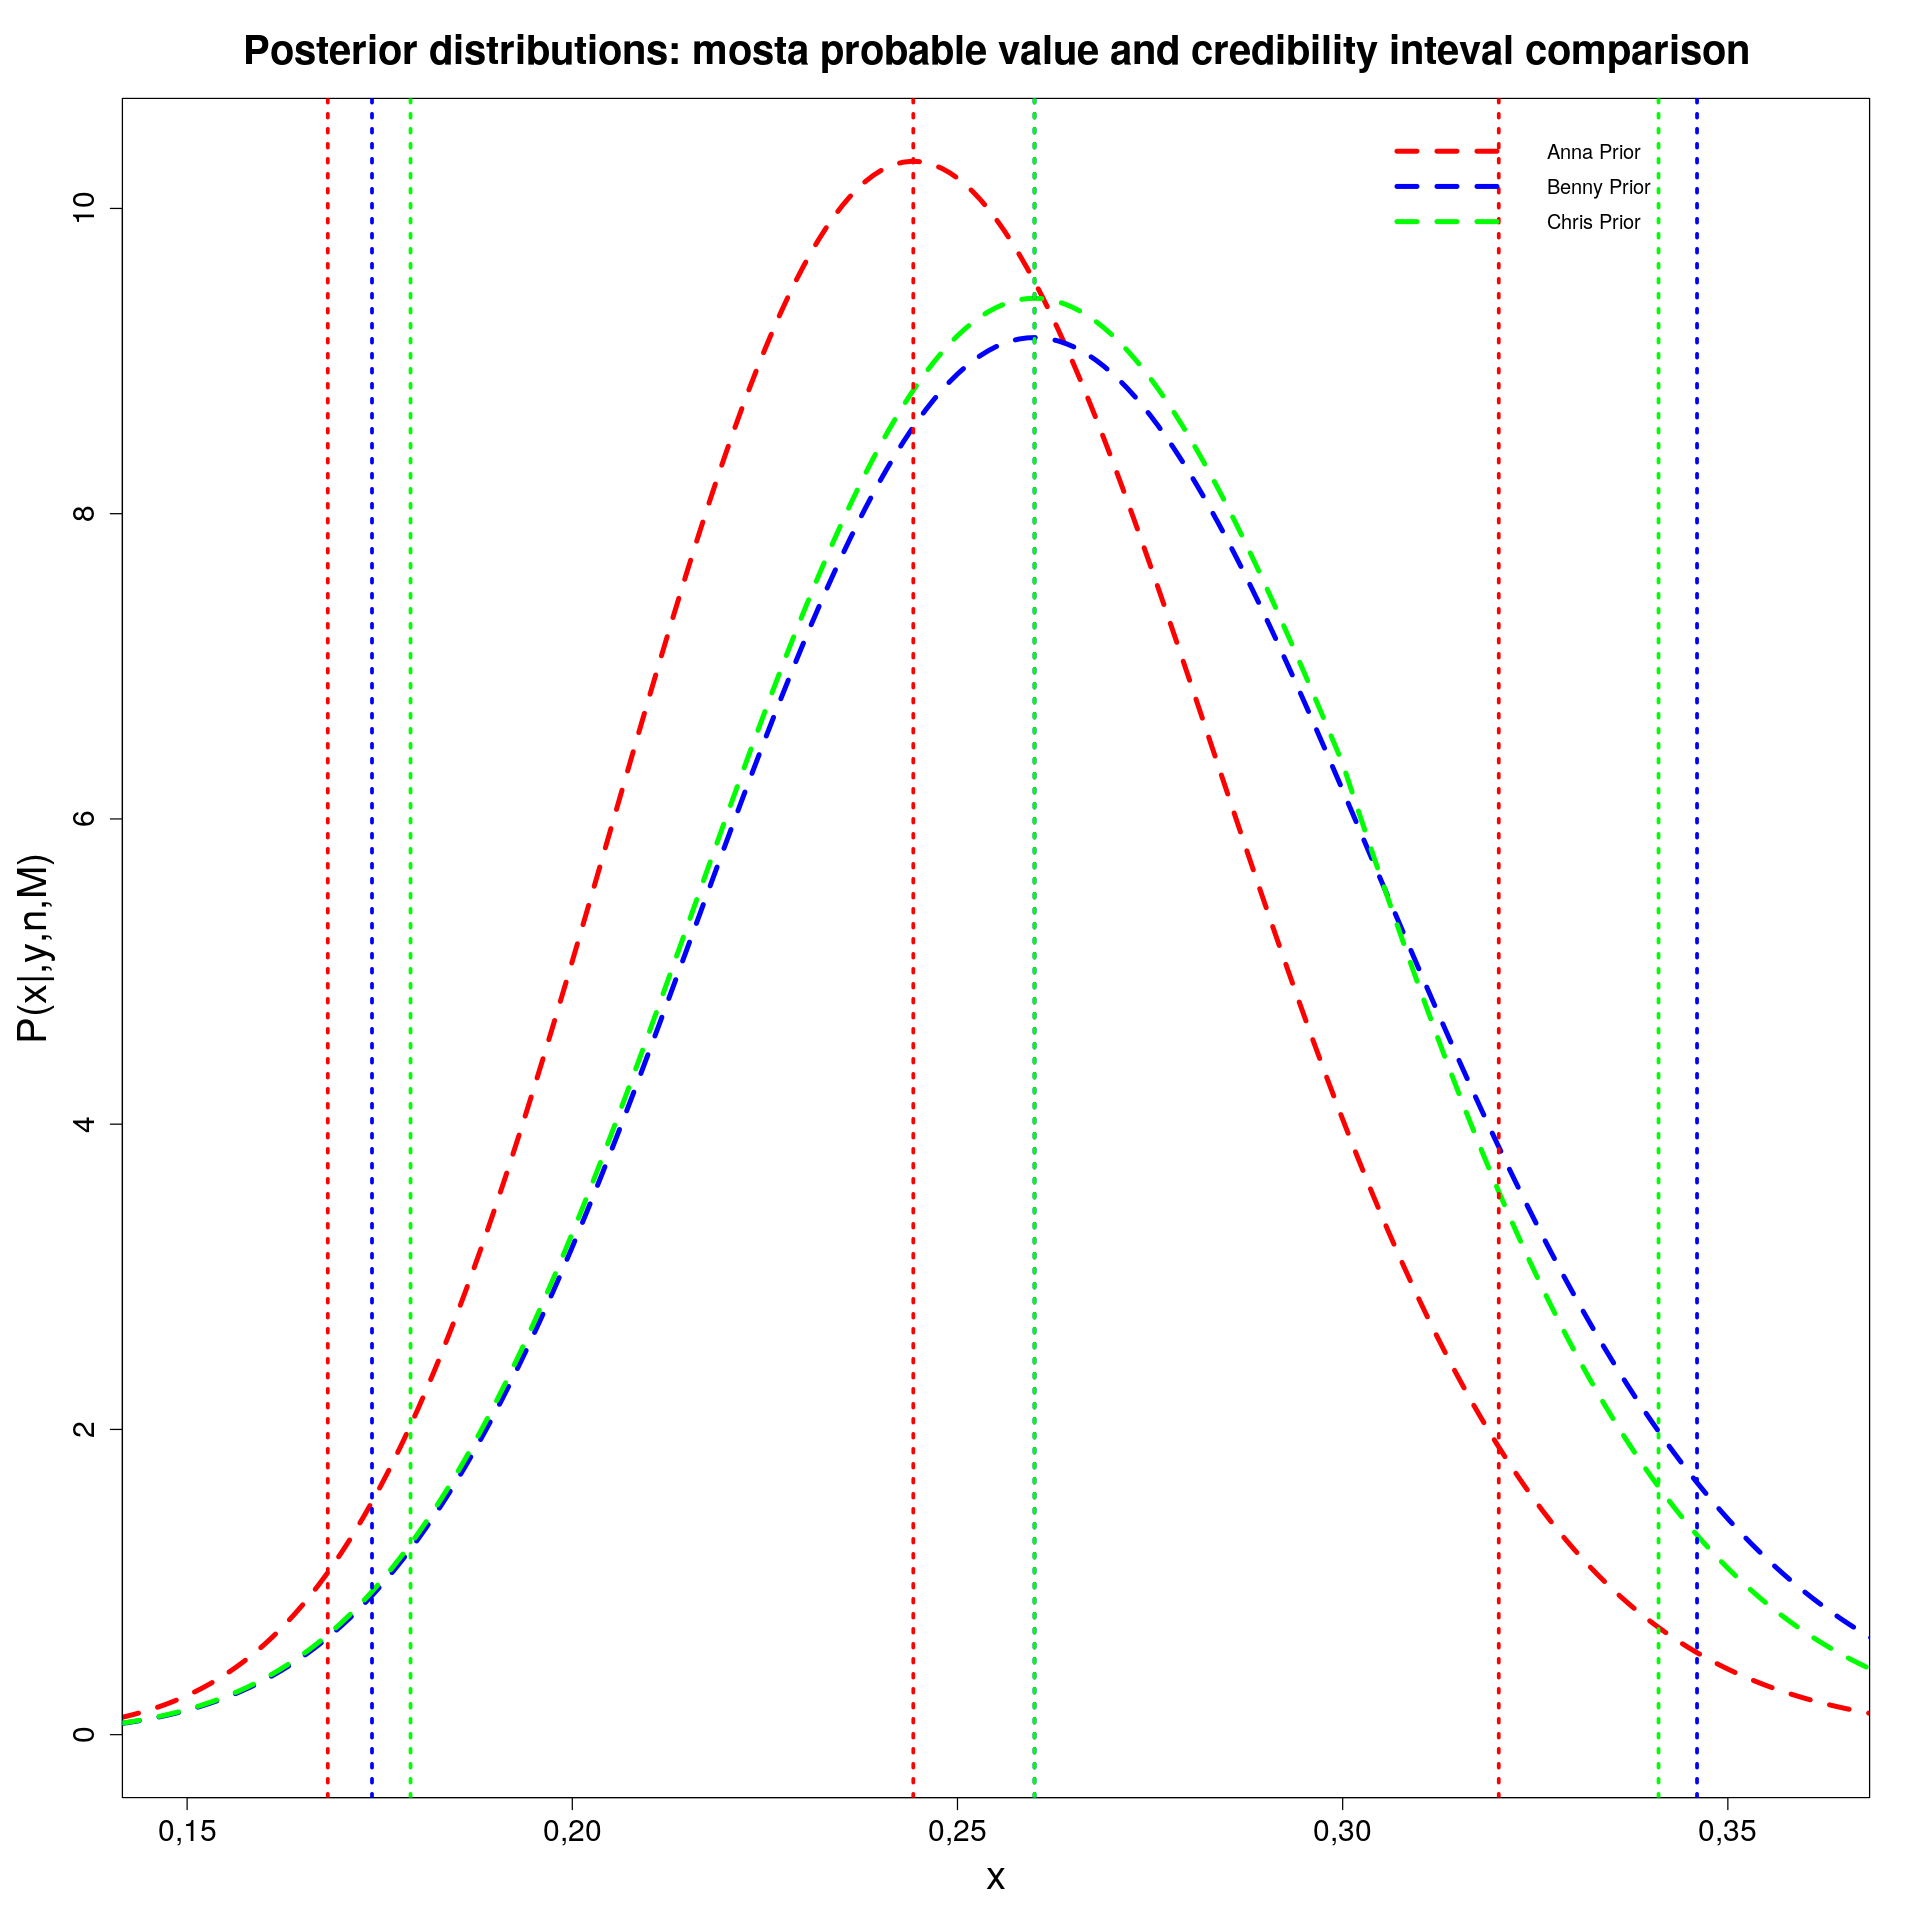

In [6]:
par(cex.lab=3, cex.axis=2, cex.main=2, mar=c(5, 5, 4, 2) + 0.1)
plot (x, ann_post(x), xlim=c(0.15,0.36),type='l', lty='dashed', col='red', lwd=4, xlab='x', cex.lab=1.5,cex.axis=1.5,
      ylab='P(x|,y,n,M)', cex.lab=2, main='Posterior distributions: mosta probable value and credibility inteval comparison')
lines(x, ben_post(x), xlim=c(0.15,0.36),lty='dashed', col='blue', lwd=4, xlab='x', ylab='P(x|M)')
lines(x, chr_post(x), xlim=c(0.15,0.36),lty='dashed', col='green', lwd=4, xlab='x', ylab='P(x|M)')
abline(v=ann_pMax,  lwd=3, col='red', lty='dotted')
abline(v=p_min_ann, lwd=3, col='red', lty='dotted')
abline(v=p_max_ann, lwd=3, col='red', lty='dotted') 
abline(v=ben_pMax,  lwd=3, col='blue', lty='dotted')
abline(v=p_min_ben, lwd=3, col='blue', lty='dotted')
abline(v=p_max_ben, lwd=3, col='blue', lty='dotted') 
abline(v=chr_pMax,  lwd=3, col='green', lty='dotted')
abline(v=p_min_chr, lwd=3, col='green', lty='dotted')
abline(v=p_max_chr, lwd=3, col='green', lty='dotted') 

legend("topright", legend=c("Anna Prior", "Benny Prior", "Chris Prior"), 
       col=c('red', 'blue', 'green'),  lty='dashed', lwd=4, bty='n',y.intersp=0.5)



## Ex.3

A coin is flipped n = 30 times with the following outcomes:
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H,
H, H

**a)** Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the
data set.

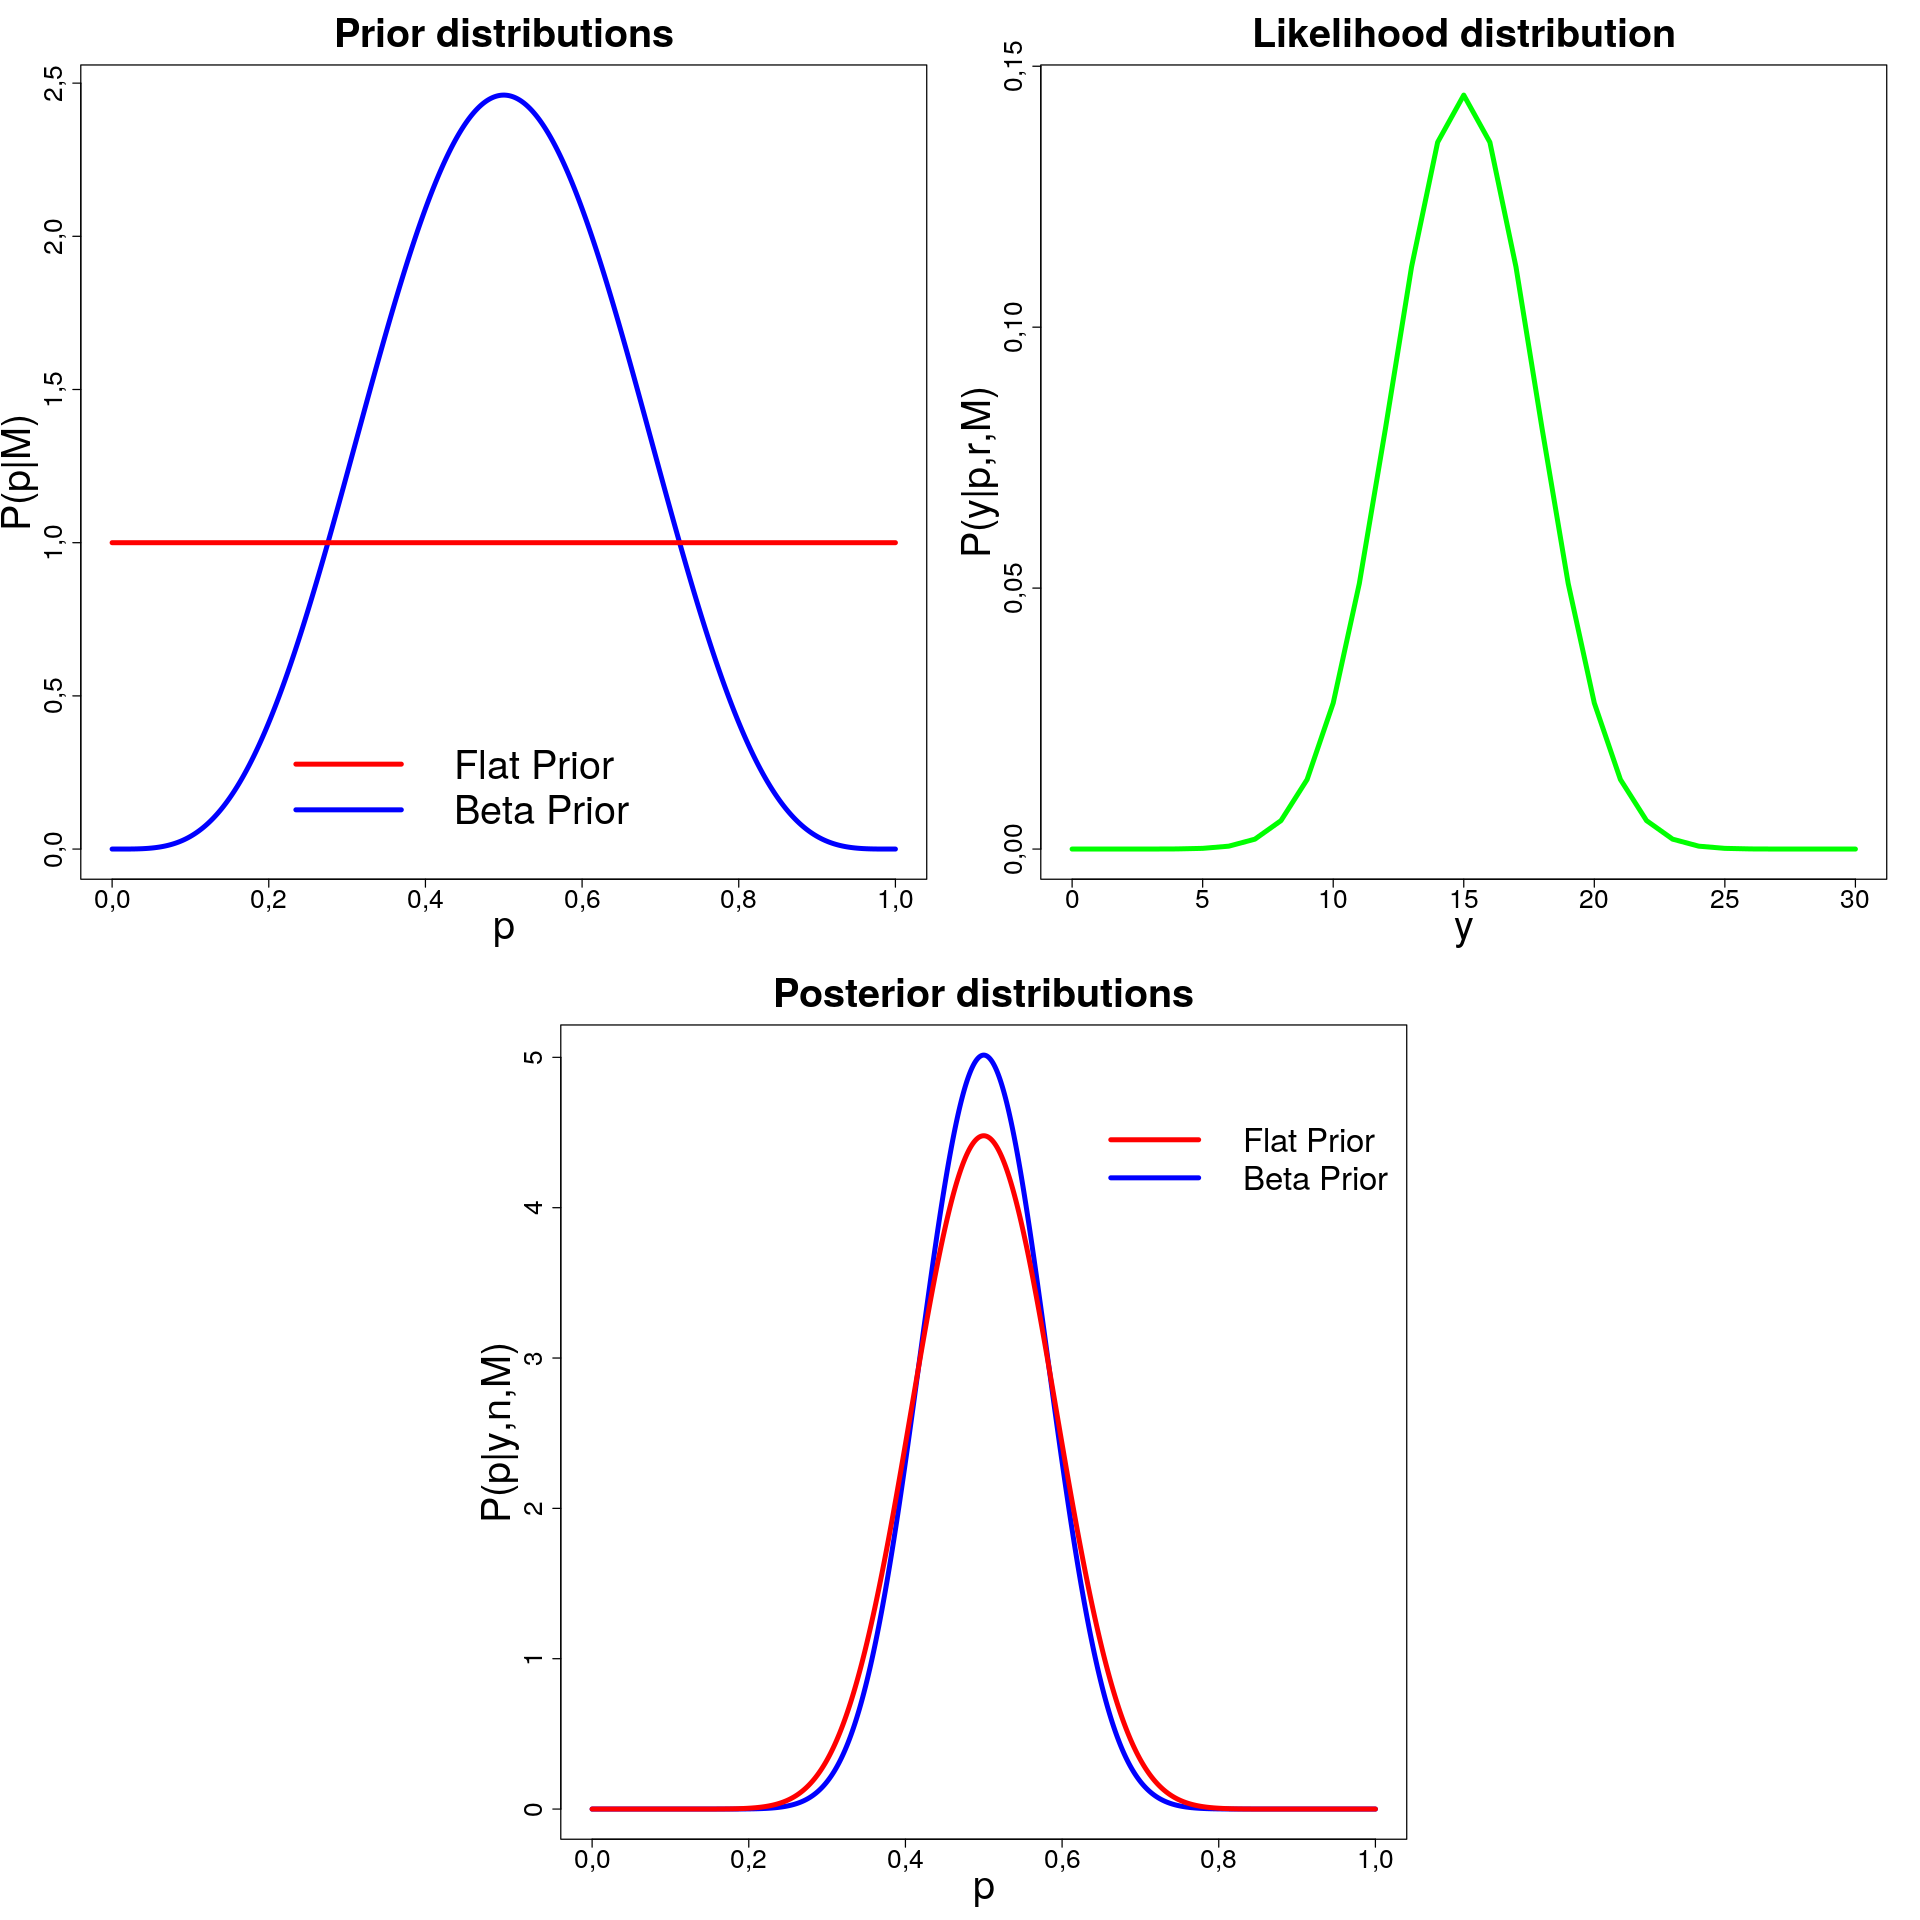

In [7]:
par(cex.lab=3, cex.axis=2, cex.main=3, mar=c(5, 5, 4, 2) + 0.1)
options(repr.plot.width=16,repr.plot.height=16)
area <- matrix (c(1,1,2,2, 0,3,3,0), nrow=2, ncol=4, byrow=TRUE)
layout(area)

H <- 1; T <- 0
y <- c(T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H)
r <- sum(y)
n <- 30 
p <- sum(r)/n #heads are 1

ps <- seq(0, 1, 0.001)
x <- seq(0, n, 1)

alpha <-5
beta <- 5
#uniform is a beta with 1,1 pars
plot(ps, dbeta(ps,alpha,beta), type='l', col='Blue',ylab='P(p|M)', xlab='p', lwd=4, main='Prior distributions')
lines(ps, dbeta(ps,1,1), type='l', col='red', lwd=4)
legend(0.1, 0.6, legend=c("Flat Prior", "Beta Prior"), 
       col=c('red', 'blue') , lwd=4, bty='n',x.intersp=0.5, y.intersp=0.3, cex=3, seg.len=1)

plot(x, dbinom(x,n, p), type='l', col='Green',xlab='y', ylab='P(y|p,r,M)', 
     lwd=4, main='Likelihood distribution')

plot (ps, dbeta(ps,alpha+r, beta+n-r), type='l', xlab='p', col='Blue',ylab='P(p|y,n,M)', lwd=4,
      main='Posterior distributions')
lines(ps, dbeta(ps,1+r, 1+n-r), type='l', col='red', lwd=4)
legend(0.55 ,5, legend=c("Flat Prior", "Beta Prior"), 
       col=c('red', 'blue') , lwd=4, bty='n',x.intersp=0.5, y.intersp=0.3, cex=2.5, seg.len=1)

**b)** Evaluate the most probable value for the coin probability p and, integrating the posterior probability
distribution, give an estimate for a 95% credibility interval.

As in point **2.c** we can estimate the most probable value as the maximum of the distribution which can be computed analytically since the posterior is a beta distribution in both cases (the uniform distribution can be see as a Beta distribution with unitary parameters)

$$p_{MAX}=\frac{y+\alpha-1}{n+\alpha+\beta-2}$$

while the credibility interval will be again estimated by integrating the posterior distribution in intervals centered in the maximum

[1] "Flat prior: "
[1] "Most probable value:  0,5"
[1] "Credibility interval: [ 0,33 , 0,67 ]"
[1] "Beta prior: "
[1] "Most probable value:  0,5"
[1] "Credibility interval: [ 0,35 , 0,65 ]"


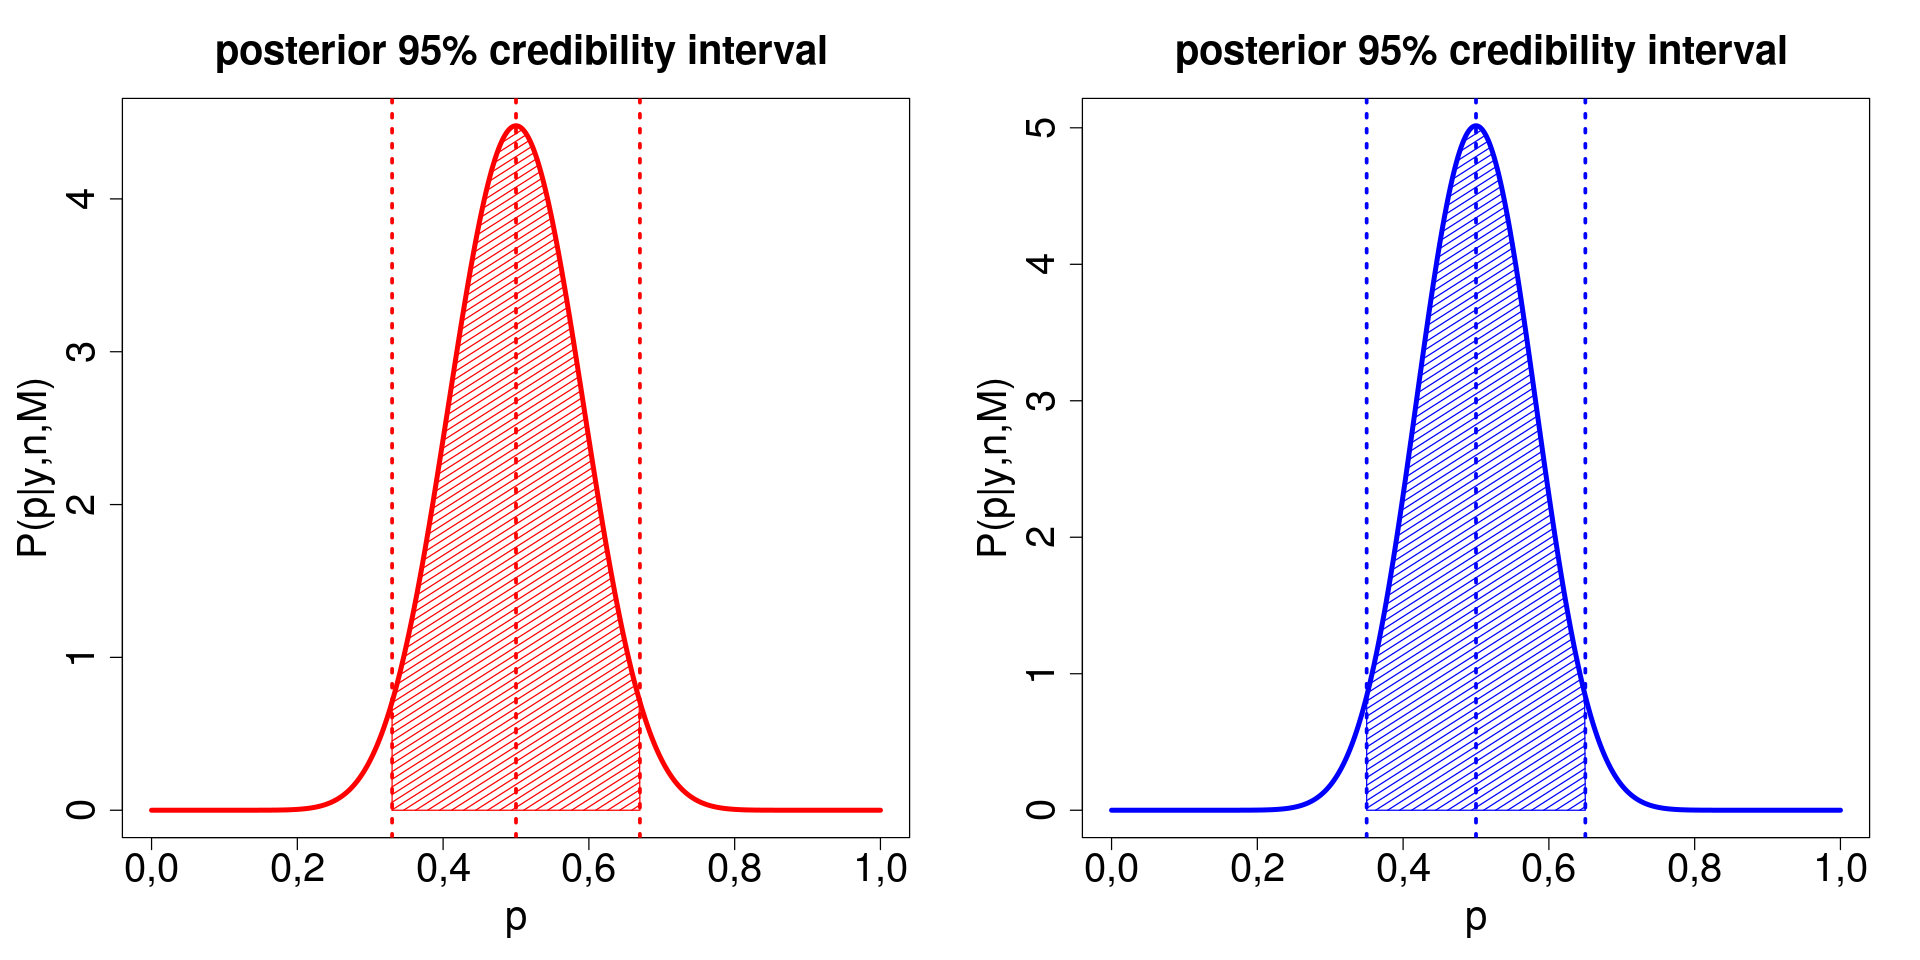

In [8]:
if(FALSE){
"idea generale:
definisco le funzioni della posterior (le so analiticamente e sono anche già normalizzate :D )
definisco due funzioni che fanno l'integrale (una per posterior) dalla media 
in un intervallo simmetrico visto che la posterior è simmetrica
poi calcolo l'integrale in un a serie di intervalli, a questo punto trovo il valore più vicino a 
0.95 prendendo il minimo del modulo della differenza e così risalgo all'intervallo"
}

max_flat = r/n
max_beta = (alpha+r-1)/(n+alpha+beta-2)

flat_post <-function(p){
    return(dbeta(p,1+r,1+ n-r))
}
beta_post <-function(p){
    return(dbeta(p,alpha+r,beta+ n-r))
}

flat_inte <- function(x) {
    integrate(flat_post,lower=max_flat-x, upper=max_flat+x)$value
}
beta_inte <- function(x) {
    integrate(beta_post,lower=max_beta-x, upper=max_beta+x)$value
}

pMax_flat <- r/n
pMax_beta <- (r+alpha-1)/(n+alpha+beta-2)

dist <- seq(0, 0.5, 0.01)

integ_flat <- sapply(dist,flat_inte)
index_flat <- which.min(abs(integ_flat - 0.95))
p_min_flat <- max_flat - dist[index_flat]
p_max_flat <- max_flat + dist[index_flat]

integ_beta <- sapply(dist,beta_inte)
index_beta <- which.min(abs(integ_beta - 0.95))
p_min_beta <- max_beta - dist[index_beta]
p_max_beta <- max_beta + dist[index_beta]

print("Flat prior: ")
print(paste("Most probable value: ", max_flat))
print(paste("Credibility interval: [", p_min_flat,",",p_max_flat,"]"))
print("Beta prior: ")
print(paste("Most probable value: ", max_beta))
print(paste("Credibility interval: [", p_min_beta,",",p_max_beta,"]"))

par(cex.lab=2, cex.axis=2, cex.main=2, mar=c(5, 5, 4, 2) + 0.1)
options(repr.plot.width=16,repr.plot.height=8)
area <- matrix (c(1,2), nrow=1, ncol=2, byrow=TRUE)
layout(area)

ps <- seq(0,1,0.001)

plot(ps, flat_post(ps), type='l', col='red', lwd=4, xlab='p',ylab='P(p|y,n,M)',
     main=' posterior 95% credibility interval')
abline(v=pMax_flat , col='red', lty='dotted', lwd=3)
abline(v=p_min_flat, col='red', lty='dotted', lwd=3)
abline(v=p_max_flat, col='red', lty='dotted', lwd=3)
flat_plt <- ps[ps>p_min_flat & ps < p_max_flat]
polygon(  c(p_min_flat, flat_plt,p_max_flat), 
          c(0,flat_post(flat_plt),0), col='red', density=40, angle=60  )


plot(ps, beta_post(ps), type='l', col='blue', lwd=4, xlab='p',ylab='P(p|y,n,M)',
     main=' posterior 95% credibility interval')
abline(v=pMax_beta , col='blue', lty='dotted', lwd=3)
abline(v=p_min_beta, col='blue', lty='dotted', lwd=3)
abline(v=p_max_beta, col='blue', lty='dotted', lwd=3)
beta_plt <- ps[ps>p_min_beta & ps < p_max_beta]
polygon(  c(p_min_beta, beta_plt,p_max_beta), 
          c(0,beta_post(beta_plt),0), col='blue', density=40, angle=60  )


**c)** Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable
value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to
30).

In the follwing code i generate a vector representing the prior distribution ( one for each prior ) and the for every sample in the dataset i compute the likelihood. The posterior is then computed as the product of the prior and likelihood vectors and normalized.

Once the posterior distribution is obtained the maximum and the 95% credibility interval are computed and the process is repeted using the posterior as the new prior

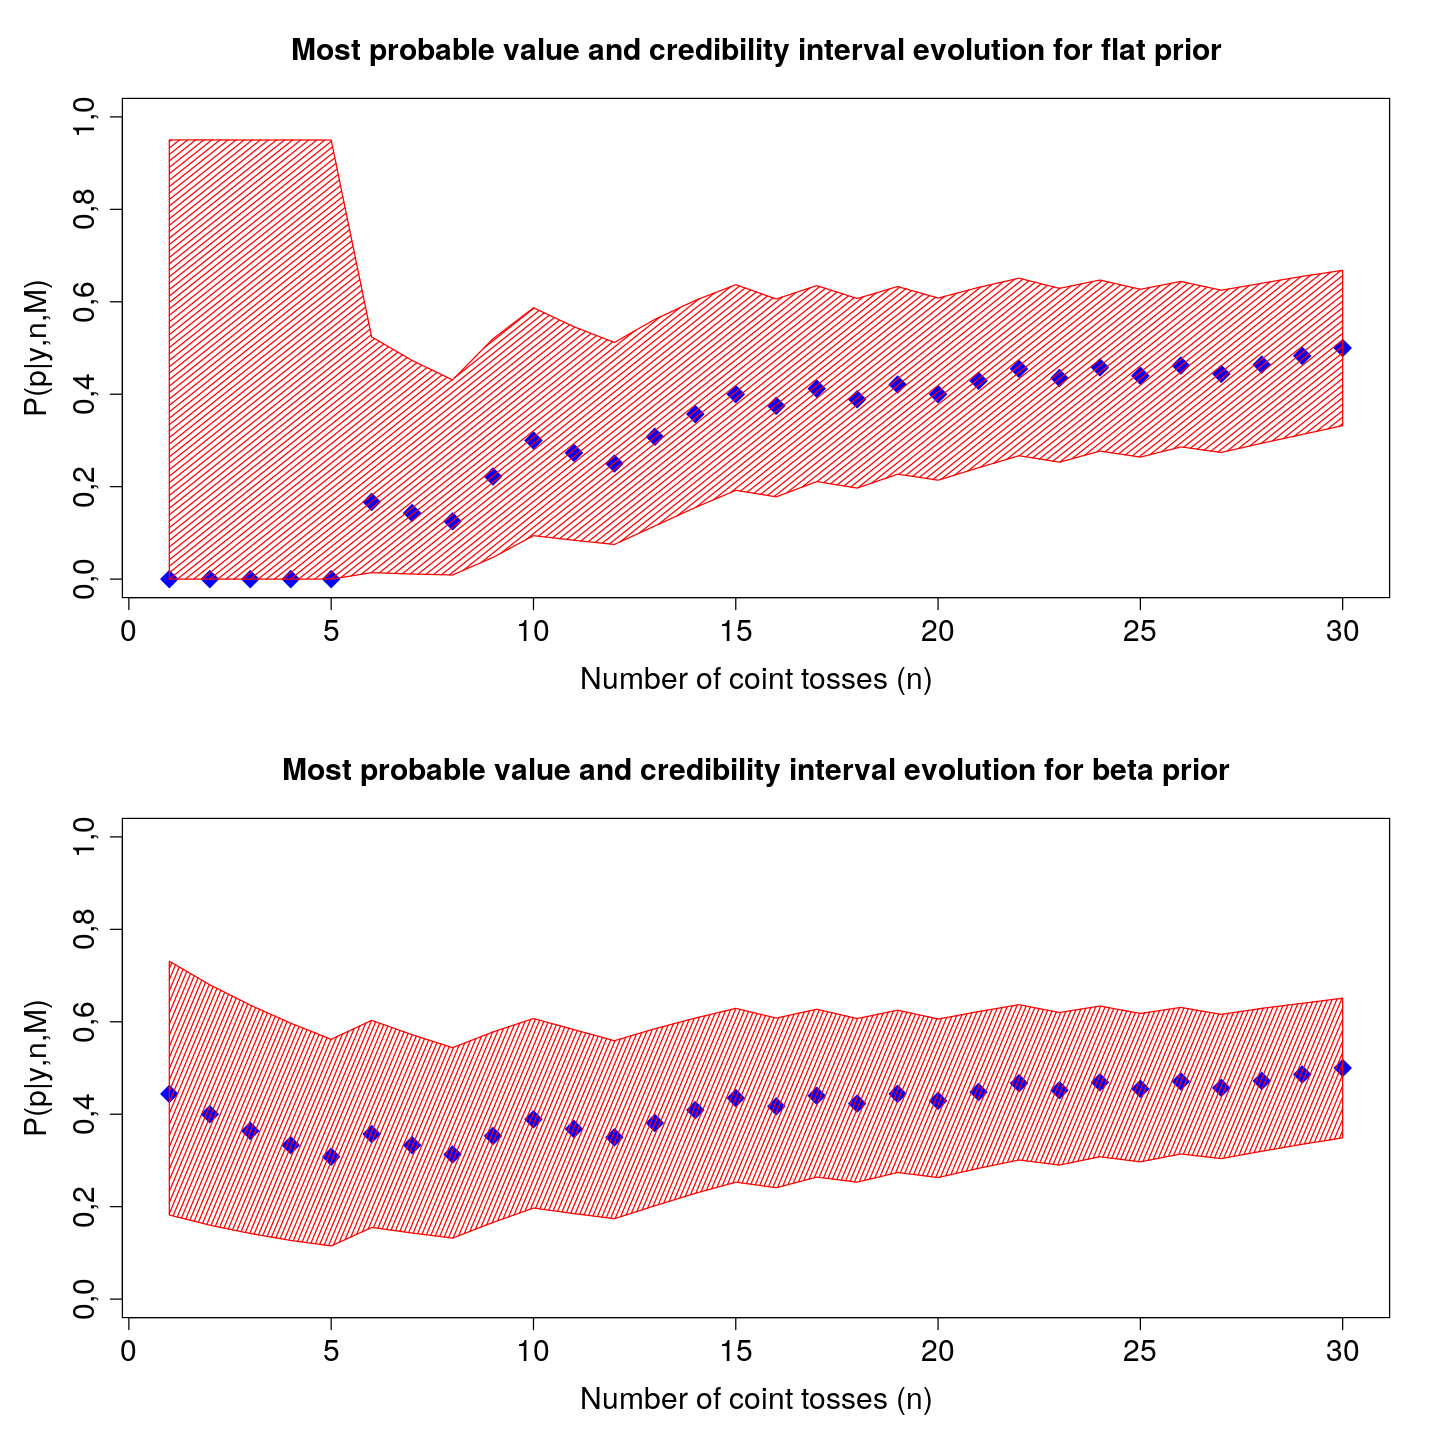

In [9]:
par(cex.lab=1.5, cex.axis=1.5, cex.main=1.5, mar=c(5, 5, 4, 2) + 0.1)
options(repr.plot.width=12,repr.plot.height=12)
area <- matrix (c(1,2), nrow=2, ncol=1, byrow=TRUE)
layout(area)


r <- 0
n <- 0
dp <- 0.001; p <- seq(0,1,dp)

#define prior distributions
flat_prior <- dbeta(p, 1,1)
beta_prior <- dbeta(p, 5,5)

#instantiate the vectors
max_flat_seq <- vector('numeric', length(y))
max_beta_seq <- vector('numeric', length(y))
flat_int_min <- vector('numeric', length(y))
beta_int_min <- vector('numeric', length(y))
flat_int_max <- vector('numeric', length(y))
beta_int_max <- vector('numeric', length(y))

for (t in y){
    n <- n+1
    #compute likelihood
    coin_like <- dbinom(t,1,p)
    #compute and normalize the posteriors
    flat_post <- coin_like*flat_prior
    beta_post <- coin_like*beta_prior
    flat_post <- flat_post/mean(flat_post)
    beta_post <- beta_post/mean(beta_post)   
    
    #if(n%%10==0){
    #    plot(p, flat_post, col='red')
    #    lines(p, beta_post, col='blue')
    #    lines(p, coin_like/mean(coin_like), col='green')
    #}
    
    #compute and store maximum of the distributions
    max_flat_seq <- replace(max_flat_seq,n, p[which.max(flat_post)]) 
    max_beta_seq <- replace(max_beta_seq,n, p[which.max(beta_post)]) 
    
    #compute the credibility interval (0.95 is the default search in the ncredint method)
    flat_int <- emdbook::ncredint(p,flat_post,verbose=TRUE)
    beta_int <- emdbook::ncredint(p,beta_post,verbose=TRUE)
    
    #store the credibility intervals
    #the function fails for the cases where the maximum is at zero ( the first cases in the flat prior )
    #so i do it by hand
    if(max_flat_seq[n]==0){
        integ_flat <- cumsum(flat_post)*dp
        fmin <- 0
        fmax <-integ_flat[ which.min(abs(integ_flat - 0.95))]
        flat_int_min <- replace(flat_int_min , n, fmin) 
        flat_int_max <- replace(flat_int_max , n, fmax) 
    } else {
        flat_int_min <- replace(flat_int_min , n, flat_int[['lower']]) 
        flat_int_max <- replace(flat_int_max , n, flat_int[['upper']]) 
    }
    
    beta_int_min <- replace(beta_int_min , n, beta_int[['lower']]) 
    beta_int_max <- replace(beta_int_max , n, beta_int[['upper']]) 
    
    #update prior distributions
    flat_prior <- flat_post
    beta_prior <- beta_post
}


ns <- seq(1,30,1)
plot(1:n, max_flat_seq, ylim=c(0,1), pch=23,ylab='P(p|y,n,M)', xlab='Number of coint tosses (n)',
     col='blue', bg='blue',cex=1.5, 
     main="Most probable value and credibility interval evolution for flat prior")
polygon(  c(ns, rev(ns)), c(flat_int_min,rev(flat_int_max))  ,
          col='red', density=60, angle=30  )

plot(1:n, max_beta_seq, ylim=c(0,1), ylab='P(p|y,n,M)', xlab='Number of coint tosses (n)',
     col='blue', bg='blue',cex=1.5, pch=23,
     main="Most probable value and credibility interval evolution for beta prior")
polygon(  c(ns, rev(ns)), c(beta_int_min,rev(beta_int_max))  ,
          col='red', density=60, angle=60  )


**d)** Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis
(i.e. considering all the data as a whole) ?

In the following cells the results obtained with the two approaches are compared: as we can see and as we expected the result is the same either performing a One-Step analysis or a Sequantial one.

In [10]:
print("Flat prior")
print(paste("Most probable value, One -Step:    ", max_flat))
print(paste("Most probable value, Sequantial:   ", max_flat_seq[n]))
print(paste("Credibility interval, One-Step:   [", p_min_flat,",",p_max_flat,"]"))
print(paste("Credibility interval, Sequential: [", round(flat_int_min[n],2),",",round(flat_int_max[n],2),"]" ))
print("Beta prior: ")
print(paste("Most probable value, One -Step:    ", max_beta))
print(paste("Most probable value, Sequantial:   ", max_beta_seq[n]))
print(paste("Credibility interval, One-Step:   [", p_min_beta,",",p_max_beta,"]"))
print(paste("Credibility interval, Sequential: [", round(beta_int_min[n],2),",",round(beta_int_max[n],2),"]" ))

[1] "Flat prior"
[1] "Most probable value, One -Step:     0,5"
[1] "Most probable value, Sequantial:    0,5"
[1] "Credibility interval, One-Step:   [ 0,33 , 0,67 ]"
[1] "Credibility interval, Sequential: [ 0,33 , 0,67 ]"
[1] "Beta prior: "
[1] "Most probable value, One -Step:     0,5"
[1] "Most probable value, Sequantial:    0,5"
[1] "Credibility interval, One-Step:   [ 0,35 , 0,65 ]"
[1] "Credibility interval, Sequential: [ 0,35 , 0,65 ]"
